<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-19 07:22:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  37.8MB/s    in 0.9s    

2024-01-19 07:22:38 (37.8 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


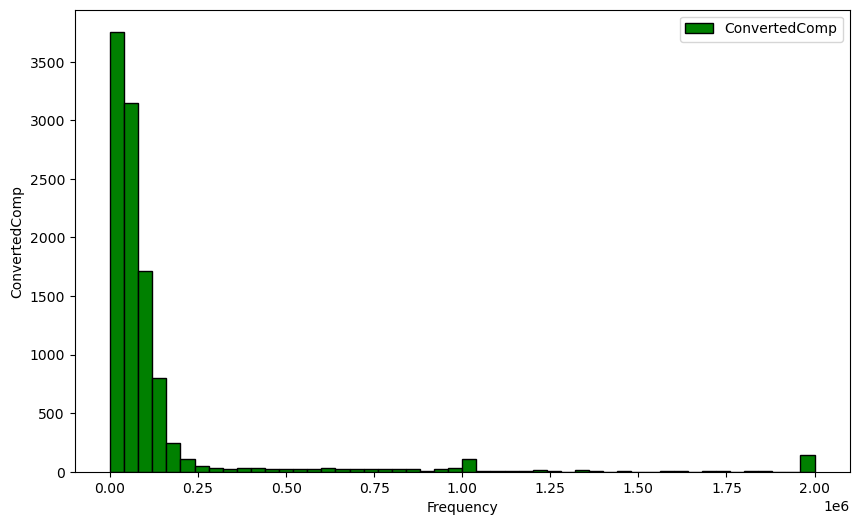

In [8]:
# your code goes here
# print how many rows are there in the table named 'master'
QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_ConvComp = pd.read_sql_query(QUERY,conn)
df_ConvComp.head()


df_ConvComp.plot(kind='hist', figsize=(10, 6), bins = 50, color ='green', edgecolor ='black')
plt.ylabel('ConvertedComp')
plt.xlabel('Frequency')

plt.show()

### Box Plots


Plot a box plot of `Age.`


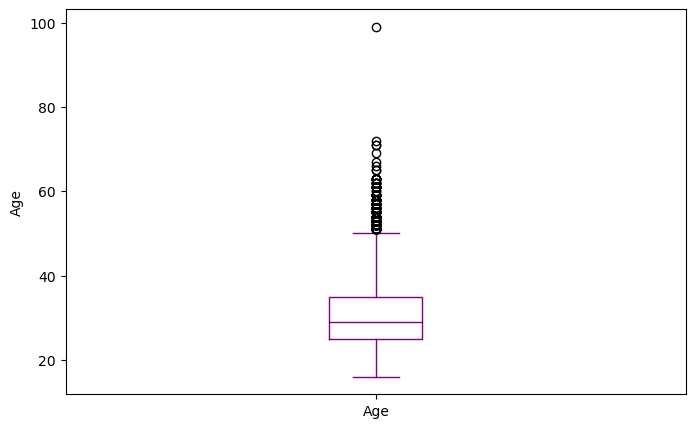

In [9]:
# your code goes here
# print how many rows are there in the table named 'master'
QUERY = """
SELECT Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_age = pd.read_sql_query(QUERY,conn)
df_age.head()


df_age.plot(kind='box', figsize=(8, 5), color ='purple')
plt.ylabel('Age')


plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [10]:
# your code goes here
# print how many rows are there in the table named 'master'
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_age_wwhrs = pd.read_sql_query(QUERY,conn)
df_age_wwhrs.head()


,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


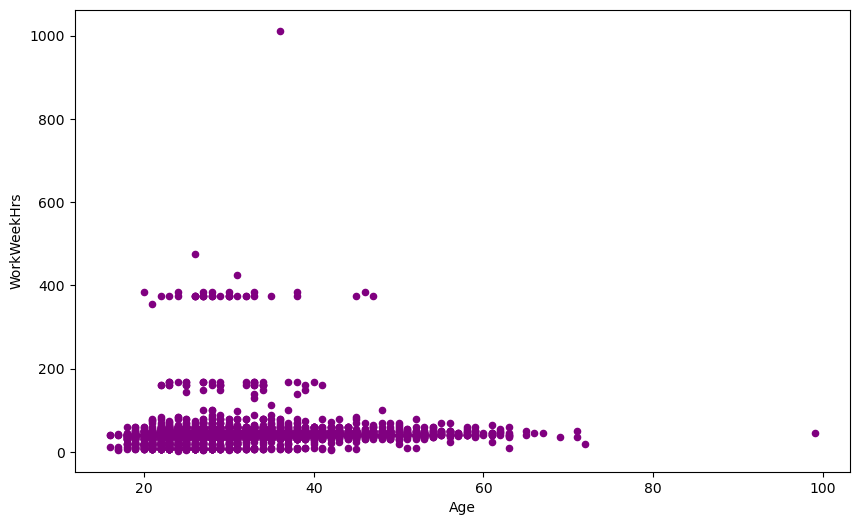

In [11]:

df_age_wwhrs.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='purple')

plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [12]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs,CodeRevHrs
FROM master
"""


df_awc = pd.read_sql_query(QUERY,conn)
df_awc.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


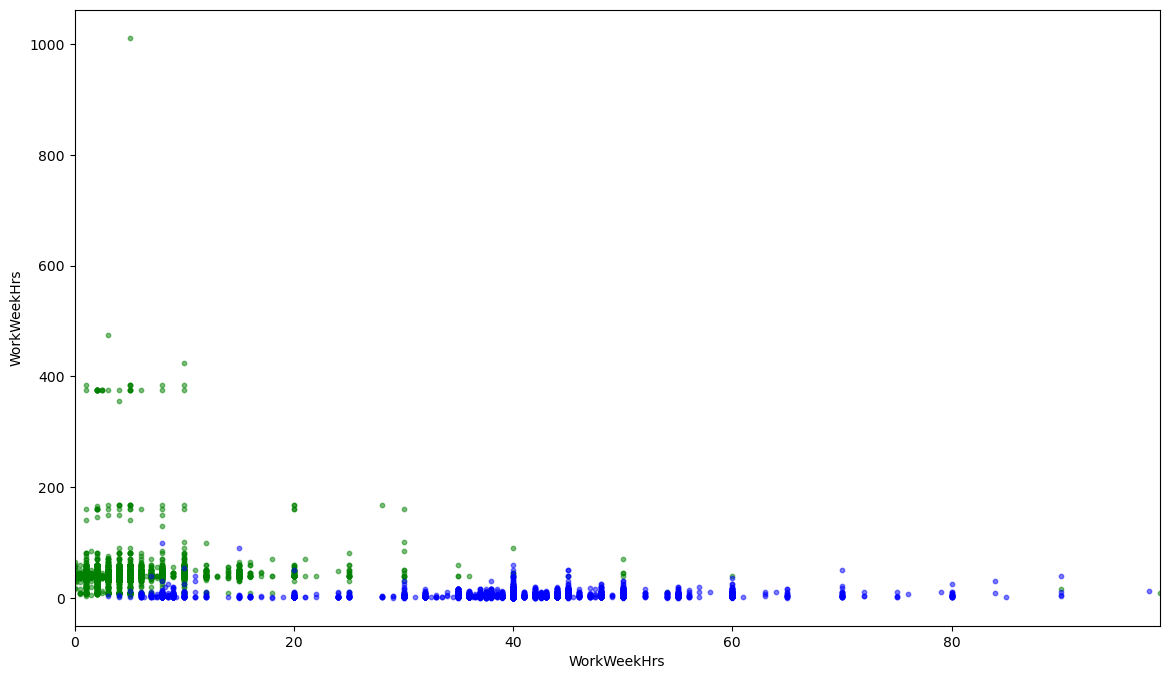

In [13]:
# Drop rows with missing values in relevant columns
df_awc = df_awc.dropna(subset=['CodeRevHrs', 'WorkWeekHrs', 'Age'])

# Replace infinite values with NaN, then drop rows with NaN
df_awc.replace([np.inf, -np.inf], np.nan, inplace=True)
df_awc = df_awc.dropna()

# Now you can proceed with your plotting code
ax0 = df_awc.plot(kind='scatter', x='CodeRevHrs', y='WorkWeekHrs', figsize=(14, 8), alpha=0.5, color='green', s=10, xlim=(min(df_awc['CodeRevHrs']), max(df_awc['CodeRevHrs'])))
ax1 = df_awc.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', alpha=0.5, color="blue", s=10, ax=ax0)
ax0.set_ylabel('WorkWeekHrs')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [14]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY, conn)
df

,DatabaseDesireNextYear,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


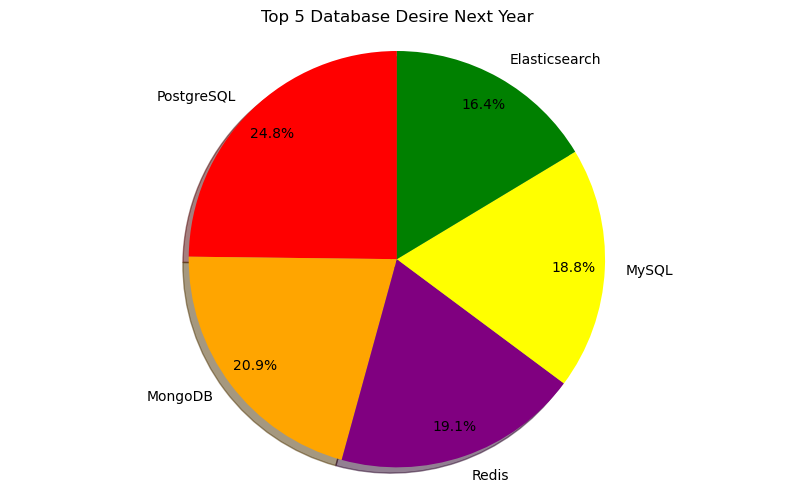

In [15]:

df.set_index('DatabaseDesireNextYear', inplace=True)

color_list = ['red', 'orange', 'purple', 'yellow', 'green']
labels = df.index  


plt.figure(figsize=(10, 6)) 
plt.pie(df['Count'], labels=labels, colors=color_list, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85)
plt.title('Top 5 Database Desire Next Year') 
plt.axis('equal') 

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [16]:
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df_wrkwk = pd.read_sql_query(QUERY, conn)
df_wrkwk.head()



,WorkWeekHrs,CodeRevHrs,Age
0,8.0,3.0,31.0
1,40.0,2.0,34.0
2,40.0,2.0,32.0
3,42.0,15.0,34.0
4,40.0,2.0,33.0


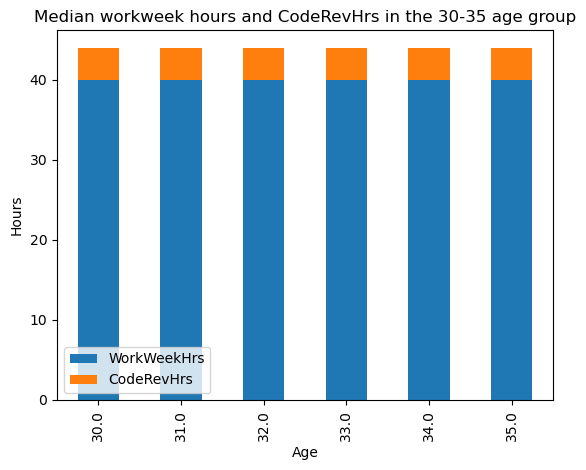

In [17]:
df_graph = df_wrkwk.groupby("Age").median()
df_graph.plot(kind='bar', stacked=True)
plt.title('Median workweek hours and CodeRevHrs in the 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [18]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df_convtcomp = pd.read_sql_query(QUERY,conn)
df_convtcomp.head()


,ConvertedComp,Age
0,31140.0,31.0
1,114000.0,34.0
2,100000.0,32.0
3,60000.0,34.0
4,51150.0,33.0


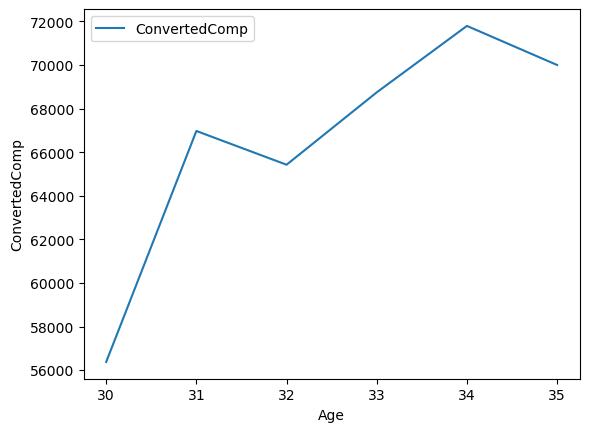

In [19]:
df_line_graph = df_convtcomp.groupby("Age").median()
df_line_graph.plot(kind='line', stacked=True)

plt.xlabel('Age')
plt.ylabel('ConvertedComp')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [20]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(MainBranch) AS count_Main_Branch
FROM master
group by MainBranch
order by count_Main_Branch
"""

df_mainbranch = pd.read_sql_query(QUERY,conn)
df_mainbranch.head()


,MainBranch,count_Main_Branch
0,"I am not primarily a developer, but I write co...",780
1,I am a developer by profession,10618


In [ ]:
df_mainbranch.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('MainBranch')

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
